# Step 1: Install Required Libraries and import data

In [20]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [25]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better readability
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# Step 2: Load MovieLens 100k Data
ratings_path = 'ml-100k/u.data'

# The separator is '\t'
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
ratings_df = pd.read_csv(ratings_path, sep='\t', names=column_names)

# Step 3: View first 5 rows
print("First 5 entries of the dataset\n")
print(ratings_df.head())
print("\n\nInfo of the dataset\n")
print(ratings_df.info())
print("\n\nDescription of the dataset\n")
print(ratings_df.describe())


First 5 entries of the dataset

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


Info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None


Description of the dataset

            user_id        item_id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000     

# Step 2: Data Cleaning

In [27]:
# Check for missing values
ratings_df.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [21]:
# Check for duplicate entries
duplicate_count = ratings_df.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

Duplicate rows: 0


In [24]:
# Inspect data types
ratings_df.dtypes

user_id      int64
item_id      int64
rating       int64
timestamp    int64
dtype: object

In [32]:
# Check the unique values
print("Unique users:", ratings_df['user_id'].nunique())
print("Unique movies:", ratings_df['item_id'].nunique())


Unique users: 943
Unique movies: 1682


# Step 3: Exploratory Data Analysis (EDA)


### 3.1. Distribution of ratings

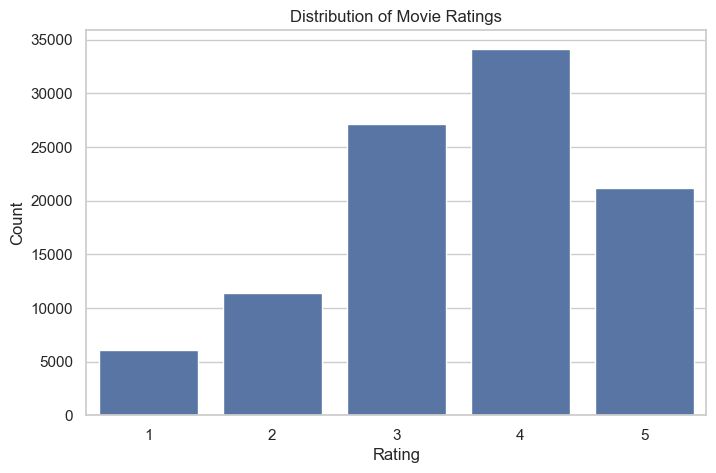

In [34]:
# Plot distribution of ratings
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=ratings_df)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### 3.2 Number of ratings per user

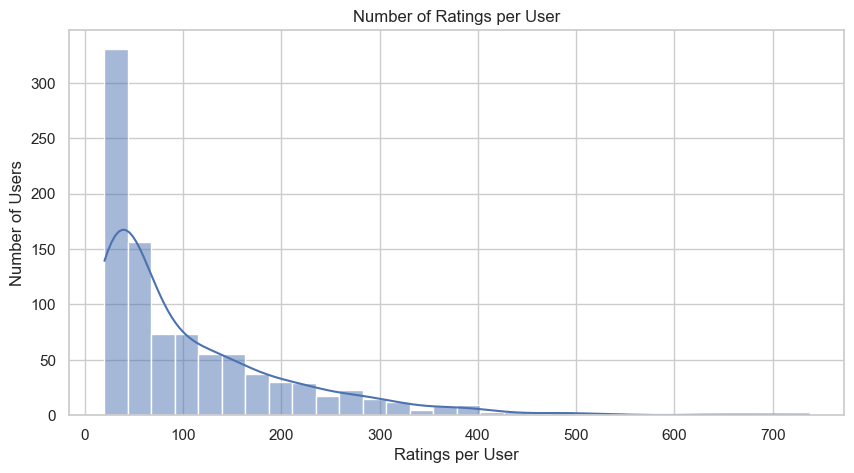

In [35]:
# Ratings per user
ratings_per_user = ratings_df.groupby('user_id')['rating'].count()

plt.figure(figsize=(10,5))
sns.histplot(ratings_per_user, bins=30, kde=True)
plt.title("Number of Ratings per User")
plt.xlabel("Ratings per User")
plt.ylabel("Number of Users")
plt.show()


### 3.3 Number of ratings per movie

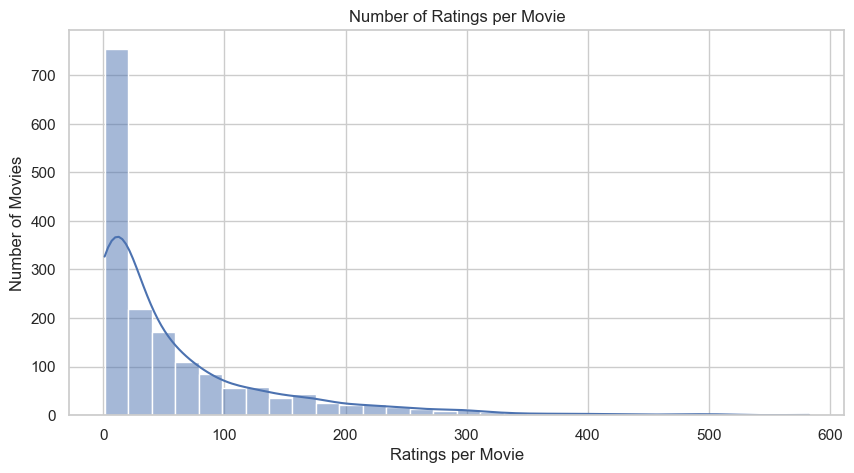

In [37]:
# Ratings per movie
ratings_per_movie = ratings_df.groupby('item_id')['rating'].count()

plt.figure(figsize=(10,5))
sns.histplot(ratings_per_movie, bins=30, kde=True)
plt.title("Number of Ratings per Movie")
plt.xlabel("Ratings per Movie")
plt.ylabel("Number of Movies")
plt.show()


### Insights:

Some users are very active **(more than 700 ratings)**.

Many users are less active (e.g., 25% of users gave < 33 ratings).

This imbalance could bias the model toward heavy users.

We'll keep this in mind during feature engineering or modeling, especially if we do any normalization or filtering.

### 3.4 Outlier Check

In [41]:
# Summary statistics for ratings per user and per movie
print("Ratings per User:")
print(ratings_per_user.describe())

print("\nRatings per Movie:")
print(ratings_per_movie.describe())


Ratings per User:
count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: rating, dtype: float64

Ratings per Movie:
count    1682.000000
mean       59.453032
std        80.383846
min         1.000000
25%         6.000000
50%        27.000000
75%        80.000000
max       583.000000
Name: rating, dtype: float64


### Insights

#### Users:
Some users are very active **(more than 700 ratings)**.

Many users are less active (e.g., 25% of users gave < 33 ratings).

This imbalance could bias the model toward heavy users.

We'll keep this in mind during feature engineering or modeling, especially if we do any normalization or filtering.

#### Movies:

Some movies have very few ratings **(even just 1)**, which means the model may not learn useful patterns for them.
We might consider filtering out low-frequency movies for better model performance, depending on your strategy.

# Step 4: Feature Engineering
